In [1]:
%%html
<style>.container { width:95% !important; } pre { white-space: pre }</style>

# COVID-19 Data Prep
The AA group at FedEx DI is going to do a COVID-19-related hackathon. I want to provide a train/validation dataset that they can work against and a test dataset that they wouldn't have seen (though they can get the data online, obviously). This notebook does the preparation of that data in readiness for the hackathon.

## Libraries

In [113]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 500)
pd.set_option("display.max_rows", 1000)
pd.set_option("display.width", 1000)

## Load basic data

In [11]:
base_data_path = f'~/PyCharmProjects/covid-19-analysis/data/COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
base_data = pd.read_csv(base_data_path)
base_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750,766,773,782,789,795,803,820,832,842,850,856,868,872,876
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743,743,745,745,747,748,750,751,751,752,752,754,755,755,758
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27,27,27,30,35,35,35,36,36,36,43,43,45,45,45


In [66]:
base_cols = ['Province/State', 'Country/Region', 'Lat', 'Long']
test_data_cols = ['4/29/20', '4/30/20', '5/1/20', '5/2/20', '5/3/20', '5/4/20', '5/5/20', '5/6/20', '5/7/20', '5/8/20', '5/9/20', '5/10/20', '5/11/20', '5/12/20']
train_data_cols = [col for col in base_data.columns if col not in test_data_cols]

train_data = base_data[train_data_cols]
test_data = base_data[base_cols + test_data_cols]


In [67]:
train_data.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20,3/30/20,3/31/20,4/1/20,4/2/20,4/3/20,4/4/20,4/5/20,4/6/20,4/7/20,4/8/20,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20,4/27/20,4/28/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,4,4,5,7,7,7,11,16,21,22,22,22,24,24,40,40,74,84,94,110,110,120,170,174,237,273,281,299,349,367,423,444,484,521,555,607,665,714,784,840,906,933,996,1026,1092,1176,1279,1351,1463,1531,1703,1828
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,10,12,23,33,38,42,51,55,59,64,70,76,89,104,123,146,174,186,197,212,223,243,259,277,304,333,361,377,383,400,409,416,433,446,467,475,494,518,539,548,562,584,609,634,663,678,712,726,736,750
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,3,5,12,12,17,17,19,20,20,20,24,26,37,48,54,60,74,87,90,139,201,230,264,302,367,409,454,511,584,716,847,986,1171,1251,1320,1423,1468,1572,1666,1761,1825,1914,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910,3007,3127,3256,3382,3517,3649
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,39,39,53,75,88,113,133,164,188,224,267,308,334,370,376,390,428,439,466,501,525,545,564,583,601,601,638,646,659,673,673,696,704,713,717,717,723,723,731,738,738,743,743
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,2,3,3,3,4,4,5,7,7,7,8,8,8,10,14,16,17,19,19,19,19,19,19,19,19,19,19,24,24,24,24,25,25,25,25,26,27,27


In [228]:
test_data.head()

,Province/State,Country/Region,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20,5/8/20,5/9/20,5/10/20,5/11/20,5/12/20
0,NaN,Afghanistan,1939,2171,2335,2469,2704,2894,3224,3392,3563,3778,4033,4402,4687,4963
1,NaN,Albania,766,773,782,789,795,803,820,832,842,850,856,868,872,876
2,NaN,Algeria,3848,4006,4154,4295,4474,4648,4838,4997,5182,5369,5558,5723,5891,6067
3,NaN,Andorra,743,745,745,747,748,750,751,751,752,752,754,755,755,758
4,NaN,Angola,27,27,30,35,35,35,36,36,36,43,43,45,45,45


In [229]:
def melt_df(raw_data: pd.DataFrame, id_vars: list) -> pd.DataFrame:
    """
    Method to turn a raw dataframe (with state, country, date_1, ..., date_n)
    into a dataframe with a date column and the total number of cases/deaths/etc.
    :param raw_data: The Pandas DataFrame to melt.
    :param id_vars: The columns to group by to create melted DataFrame with.
    :return: A pivoted Pandas DataFrame with a date column.
    """
    world_data = (raw_data
                  .melt(id_vars=id_vars,
                        var_name="Date",
                        value_name='total_cases')
                  )
    world_data.Date = pd.to_datetime(world_data.Date)
    return world_data

### Make the train data set

In [230]:
id_vars = ["Province/State", 'Country/Region', 'Lat', 'Long']
melted_train_data = melt_df(raw_data=train_data, id_vars=id_vars)
melted_train_data.head()

,Province/State,Country/Region,Lat,Long,Date,total_cases
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0


In [231]:
melted_train_data.to_csv('~/Desktop/data_for_COVID_hackathon/train_data.csv', header=True)

### Make the test data 
This DF is what no-one sees, and everyone will be judged against.

In [232]:
test_data = test_data.drop(columns=['Lat', 'Long'], axis=1)

KeyError: "['Lat' 'Long'] not found in axis"

In [233]:
id_vars = ["Province/State", 'Country/Region']
groupby_list_cases_per_day = ['Date', 'Country/Region']
melted_test_data = melt_df(raw_data=test_data, id_vars=id_vars)
melted_test_data = (melted_test_data
                  .groupby(groupby_list_cases_per_day, as_index=False)
                  .agg({"total_cases": "sum"})
                  )
melted_test_data.head()

,Date,Country/Region,total_cases
0,2020-04-29,Afghanistan,1939
1,2020-04-29,Albania,766
2,2020-04-29,Algeria,3848
3,2020-04-29,Andorra,743
4,2020-04-29,Angola,27


In [77]:
empty_test_data = melted_test_data.copy(deep=True)
empty_test_data.total_cases = empty_test_data.total_cases.values[:] = 0
empty_test_data.head()

,Date,Country/Region,total_cases
0,2020-04-29,Afghanistan,0
1,2020-04-29,Albania,0
2,2020-04-29,Algeria,0
3,2020-04-29,Andorra,0
4,2020-04-29,Angola,0


In [78]:
empty_test_data.loc[empty_test_data.total_cases > 0].head()

,Date,Country/Region,total_cases


In [79]:
empty_test_data.to_csv('~/Desktop/data_for_COVID_hackathon/empty_test.csv', header=True)

# Write the functions for appraisal

## Function to join the data for each participant

In [96]:
print(f"length of melted_test_data: {melted_test_data.shape[0]}")
print(f"length of empty_test_data: {empty_test_data.shape[0]}")

length of melted_test_data: 2618
length of empty_test_data: 2618


In [109]:
def make_test_df(actual_data_df: pd.DataFrame, predictions_df: pd.DataFrame, participant_name: str='Wido') -> pd.DataFrame:
    """
    Method to make a Pandas DF of the predicted answers and the actual answers 
    for the COVID-19 AA Hackathon.
    """
    
    if not participant_name.lower() in ['wido', 'xin', 'jonathon']:
        print(f"Unrecognised participant '{participant_name}'.\n Please check and try again.")
    
    # rename the total_cases to actual_cases
    actual_data_df.rename(columns={'total_cases': 'actual_cases'}, inplace=True)
    
    # rename the total_cases from the participant_df to 'predicted_cases'
    predictions_df.rename(columns={'total_cases': 'predicted_cases'}, inplace=True)
    
    # merge the two DFs on the 'Date' and 'Country/Region' columns
    merge_cols = ['Date', 'Country/Region']
    return pd.merge(actual_data_df, predictions_df, on=merge_cols)

In [110]:
df_to_compare = make_test_df(actual_data_df=melted_test_data, predictions_df=empty_test_data, participant_name='Xin')
df_to_compare.head()

,Date,Country/Region,actual_cases,predicted_cases
0,2020-04-29,Afghanistan,1939,0
1,2020-04-29,Albania,766,0
2,2020-04-29,Algeria,3848,0
3,2020-04-29,Andorra,743,0
4,2020-04-29,Angola,27,0


## Write the comparison function

In [128]:
def mape_vectorized_v2(a, b): 
    mask = a != 0
    return (np.fabs(a - b)/a)[mask].mean()

In [193]:
def rate_submission(df_to_rate: pd.DataFrame) -> pd.DataFrame:
    """
    Method to calculate the Mean Absolute Percentage Error(MAPE)
    for two columns in a Pandas DataFrame.
    """
    
    df_to_rate['mape'] = (df_to_rate
                          .apply(lambda x: (np.where(x.actual_cases == 0, 
                                                     x.predicted_cases / np.median(x.actual_cases),
                                                     np.fabs(x.actual_cases - x.predicted_cases) /  x.actual_cases
                                                    )
                                           ) * 100, axis=1
                                )
                         )

    return df_to_rate

In [197]:
df_to_compare.predicted_cases = np.random.randint(0, 6000, df_to_compare.shape[0])
# df_to_compare.drop(columns=['mape_cntry'], inplace=True)
df_to_compare.head()
rated_df = rate_submission(df_to_rate=df_to_compare)
rated_df.head()

/Users/davidjones/anaconda3/envs/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
/Users/davidjones/anaconda3/envs/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


,Date,Country/Region,actual_cases,predicted_cases,mape
0,2020-04-29,Afghanistan,1939,1028,46.982981
1,2020-04-29,Albania,766,1253,63.577023
2,2020-04-29,Algeria,3848,5071,31.782744
3,2020-04-29,Andorra,743,5831,684.791386
4,2020-04-29,Angola,27,3670,13492.592593


In [198]:
rated_df.mape.mean()

inf

In [164]:
rated_df.loc[rated_df.mape == rated_df.mape.min()]

,Date,Country/Region,actual_cases,predicted_cases,mape,mape_cntry
683,2020-05-02,New Zealand,1487,1488,0.067249,191.661063


# Create main function

In [200]:
def rate_covid_model(actual_data_df: pd.DataFrame, predictions_df: pd.DataFrame, participant_name: str):
    """
    Function to assess the model.
    """
    df_to_compare = make_test_df(actual_data_df, predictions_df, participant_name)
    rated_df = rate_submission(df_to_rate=df_to_compare)
    
    return rated_df, rated_df.mape.mean()

### Try Xin's model

In [226]:
xins_path = '../data/pred.tsv'
xin_data = pd.read_csv(xins_path, sep="\t", header=0)
xin_data.head()

,seq,region,total_cases
0,0,Afghanistan,1984.766987
1,1,Afghanistan,2117.633820
2,2,Afghanistan,2265.990157
3,3,Afghanistan,2402.002740
4,4,Afghanistan,2545.381811


In [235]:
melted_test_data_srtd = melted_test_data.sort_values(['Country/Region', 'Date'])
melted_test_data_srtd.head()

,Date,Country/Region,total_cases
0,2020-04-29,Afghanistan,1939
187,2020-04-30,Afghanistan,2171
374,2020-05-01,Afghanistan,2335
561,2020-05-02,Afghanistan,2469
748,2020-05-03,Afghanistan,2704


In [255]:
melted_test_data_srtd.head()
xin_afg = xin_data.loc[xin_data.region == 'Afghanistan'].rename(columns={"total_cases": "predicted_cases"})

test_afg = melted_test_data_srtd.loc[melted_test_data_srtd['Country/Region'] == 'Afghanistan'].rename(columns={"total_cases": "actual_cases"}).reset_index()


In [256]:
print(test_afg.head())
print(xin_afg.head())

   index       Date Country/Region  actual_cases
0      0 2020-04-29    Afghanistan          1939
1    187 2020-04-30    Afghanistan          2171
2    374 2020-05-01    Afghanistan          2335
3    561 2020-05-02    Afghanistan          2469
4    748 2020-05-03    Afghanistan          2704
   seq       region  predicted_cases
0    0  Afghanistan      1984.766987
1    1  Afghanistan      2117.633820
2    2  Afghanistan      2265.990157
3    3  Afghanistan      2402.002740
4    4  Afghanistan      2545.381811


In [260]:
xins_data_to_check = pd.concat([test_afg, xin_afg], axis=1)
xins_data_to_check.drop(columns=['seq', 'region', 'index'], inplace=True)
xins_data_to_check.head()


,Date,Country/Region,actual_cases,predicted_cases
0,2020-04-29,Afghanistan,1939,1984.766987
1,2020-04-30,Afghanistan,2171,2117.633820
2,2020-05-01,Afghanistan,2335,2265.990157
3,2020-05-02,Afghanistan,2469,2402.002740
4,2020-05-03,Afghanistan,2704,2545.381811


In [263]:
xins_submission = rate_submission(df_to_rate=xins_data_to_check)
xins_submission.head(200)

,Date,Country/Region,actual_cases,predicted_cases,mape
0,2020-04-29,Afghanistan,1939,1984.766987,2.360340
1,2020-04-30,Afghanistan,2171,2117.633820,2.458138
2,2020-05-01,Afghanistan,2335,2265.990157,2.955454
3,2020-05-02,Afghanistan,2469,2402.002740,2.713538
4,2020-05-03,Afghanistan,2704,2545.381811,5.866057
5,2020-05-04,Afghanistan,2894,2682.207554,7.318329
6,2020-05-05,Afghanistan,3224,2822.349413,12.458145
7,2020-05-06,Afghanistan,3392,2958.845547,12.769884
8,2020-05-07,Afghanistan,3563,3096.642762,13.088892
9,2020-05-08,Afghanistan,3778,3232.260244,14.445203


In [264]:
xins_submission.mape.mean()

11.413233468709914

In [201]:
participant_name='Xin'
blerg = empty_test_data.copy(deep=True)
blerg.predicted_cases = np.random.randint(0, 50000, blerg.shape[0])
blerg.head()

,Date,Country/Region,predicted_cases
0,2020-04-29,Afghanistan,3230
1,2020-04-29,Albania,48904
2,2020-04-29,Algeria,22041
3,2020-04-29,Andorra,45360
4,2020-04-29,Angola,27564


In [202]:
rated_df, model_accuracy = rate_covid_model(actual_data_df=melted_test_data, predictions_df=blerg, participant_name=participant_name)
print(f"The accuracy (mean-MAPE) for {participant_name}'s model is: {model_accuracy}. Well done!'")

/Users/davidjones/anaconda3/envs/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':
/Users/davidjones/anaconda3/envs/covid19/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


The accuracy (mean-MAPE) for Xin's model is: inf. Well done!'


In [203]:
rated_df.head()

,Date,Country/Region,actual_cases,predicted_cases,mape
0,2020-04-29,Afghanistan,1939,3230,66.580712
1,2020-04-29,Albania,766,48904,6284.334204
2,2020-04-29,Algeria,3848,22041,472.791060
3,2020-04-29,Andorra,743,45360,6004.979812
4,2020-04-29,Angola,27,27564,101988.888889


In [204]:
import plotly.express as px

In [210]:
# fig = px.line(df, x="year", y="lifeExp", color='country')
# fig.show()
fig = px.scatter(rated_df,
                 x='actual_cases', 
                 y='predicted_cases', 
                 color='Country/Region',
                 log_y=True,
                 log_x=True
                )
fig.show()

# Prophet Modelling

In [211]:
melted_train_data.head()

,Province/State,Country/Region,Lat,Long,Date,total_cases
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0


In [265]:
from fbprophet import Prophet
from fbprophet.diagnostics import performance_metrics, cross_validation
from fbprophet.plot import add_changepoints_to_plot

In [267]:
melted_train_data.head()

,Province/State,Country/Region,Lat,Long,Date,total_cases
0,NaN,Afghanistan,33.0000,65.0000,2020-01-22,0
1,NaN,Albania,41.1533,20.1683,2020-01-22,0
2,NaN,Algeria,28.0339,1.6596,2020-01-22,0
3,NaN,Andorra,42.5063,1.5218,2020-01-22,0
4,NaN,Angola,-11.2027,17.8739,2020-01-22,0


In [430]:
afg_cap = 6500.0
afg_df = melted_train_data.loc[melted_train_data['Country/Region'] == 'Afghanistan']
afg_df = afg_df[['Date', 'total_cases']]
afg_df.rename(columns={"Date": 'ds', 'total_cases': 'y'}, inplace=True)
afg_df['cap'] = afg_cap
afg_df.head()

,ds,y,cap
0,2020-01-22,0,6500.0
266,2020-01-23,0,6500.0
532,2020-01-24,0,6500.0
798,2020-01-25,0,6500.0
1064,2020-01-26,0,6500.0


In [431]:
prophet = Prophet(growth='logistic')
prophet.fit(afg_df)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [432]:
future = prophet.make_future_dataframe(periods=15, freq='D')
future['cap'] = afg_cap
forecast = prophet.predict(future)


In [433]:
forecast.head()

,ds,trend,cap,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,0.539772,6500.0,-33.603835,39.034887,0.539772,0.539772,2.536166,2.536166,2.536166,2.536166,2.536166,2.536166,0.0,0.0,0.0,3.075938
1,2020-01-23,0.588871,6500.0,-32.743213,43.226415,0.588871,0.588871,3.879609,3.879609,3.879609,3.879609,3.879609,3.879609,0.0,0.0,0.0,4.468480
2,2020-01-24,0.642435,6500.0,-36.444677,40.542403,0.642435,0.642435,0.986554,0.986554,0.986554,0.986554,0.986554,0.986554,0.0,0.0,0.0,1.628989
3,2020-01-25,0.700872,6500.0,-39.383316,36.404785,0.700872,0.700872,-3.475967,-3.475967,-3.475967,-3.475967,-3.475967,-3.475967,0.0,0.0,0.0,-2.775095
4,2020-01-26,0.764623,6500.0,-42.753137,34.221144,0.764623,0.764623,-3.982157,-3.982157,-3.982157,-3.982157,-3.982157,-3.982157,0.0,0.0,0.0,-3.217534


In [434]:
results_afg = forecast[['ds', 'yhat']]
results_afg.head()

,ds,yhat
0,2020-01-22,3.075938
1,2020-01-23,4.468480
2,2020-01-24,1.628989
3,2020-01-25,-2.775095
4,2020-01-26,-3.217534


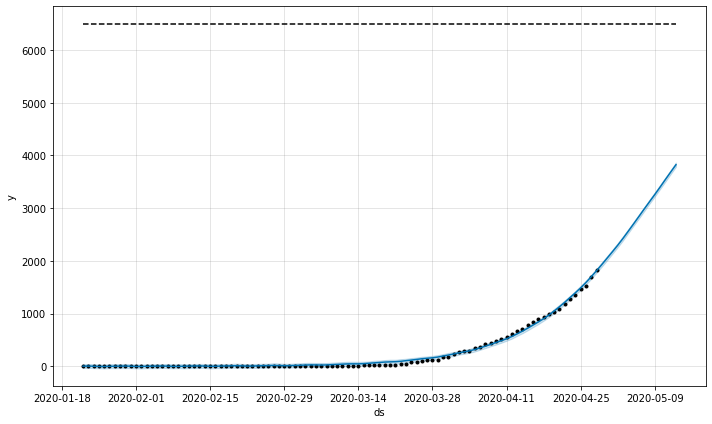

In [435]:
fig = prophet.plot(forecast)

### Assess prophet model

In [438]:
results_afg = results_afg.rename(columns={"ds": "Date", "yhat": "predicted_cases"})

test_afg = melted_test_data_srtd.loc[melted_test_data_srtd['Country/Region'] == 'Afghanistan'].rename(columns={"total_cases": "actual_cases"}).reset_index()
test_afg.drop(['index'], axis=1, inplace=True)
test_afg.head()

,Date,Country/Region,actual_cases
0,2020-04-29,Afghanistan,1939
1,2020-04-30,Afghanistan,2171
2,2020-05-01,Afghanistan,2335
3,2020-05-02,Afghanistan,2469
4,2020-05-03,Afghanistan,2704


In [439]:
results_afg_dt = results_afg.loc[(results_afg.Date >= '2020-04-29') & (results_afg.Date < '2020-05-12')].reset_index(drop=True)
prophet_data_to_check = pd.concat([test_afg, results_afg_dt], axis=1)
prophet_data_to_check.head()

,Date,Country/Region,actual_cases,Date,predicted_cases
0,2020-04-29,Afghanistan,1939,2020-04-29,1930.205278
1,2020-04-30,Afghanistan,2171,2020-04-30,2051.649020
2,2020-05-01,Afghanistan,2335,2020-05-01,2172.784755
3,2020-05-02,Afghanistan,2469,2020-05-02,2295.983345
4,2020-05-03,Afghanistan,2704,2020-05-03,2426.428589


In [440]:
prophet_submission = rate_submission(df_to_rate=prophet_data_to_check)
prophet_submission = prophet_submission[['Date', 'Country/Region', 'actual_cases', 'predicted_cases', 'mape']]
prophet_submission.head(200)

,Date,Date,Country/Region,actual_cases,predicted_cases,mape
0,2020-04-29,2020-04-29,Afghanistan,1939,1930.205278,0.453570
1,2020-04-30,2020-04-30,Afghanistan,2171,2051.649020,5.497512
2,2020-05-01,2020-05-01,Afghanistan,2335,2172.784755,6.947120
3,2020-05-02,2020-05-02,Afghanistan,2469,2295.983345,7.007560
4,2020-05-03,2020-05-03,Afghanistan,2704,2426.428589,10.265215
5,2020-05-04,2020-05-04,Afghanistan,2894,2563.334486,11.425899
6,2020-05-05,2020-05-05,Afghanistan,3224,2701.592064,16.203720
7,2020-05-06,2020-05-06,Afghanistan,3392,2841.496151,16.229477
8,2020-05-07,2020-05-07,Afghanistan,3563,2982.726830,16.286084
9,2020-05-08,2020-05-08,Afghanistan,3778,3120.740119,17.397032


In [441]:
prophet_submission.mape.mean()

13.396555464240802